In [190]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random
from sklearn import linear_model



1) Split the data into a training set (75% of data) and a test set (25% of data), using the train_test_split function with random_state = 50. Then scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the sklearn.preprocessing.scale function for this. Print the first 5 rows of the training set after scaling. (2 pts) 

2) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a 5-fold cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from $α = 10^{10}$ to $α = 10^{−6}$.

In Python, you can consider this range of values as follows: alpha = 10**numpy.linspace(6,-6,100) so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models with scaled data and report the best chosen α based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using MSE as the scoring metric. (5 pts) 

In [233]:
import pandas as pd
from pandas import Series, DataFrame
import random
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model
pd.options.mode.chained_assignment = None

df = pd.read_csv("housing_data.csv")
X = df.drop(['median_house_value'],axis=1)
Y = df['median_house_value']

Split the data into a training set (75% of data) and a test set (25% of data), using the train_test_split function with random_state = 50. Then scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the sklearn.preprocessing.scale function for this. Print the first 5 rows of the training set after scaling. (2 pts)

Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a 5-fold cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from  α=1010  to  α=10−6 .

In Python, you can consider this range of values as follows: alpha = 10**numpy.linspace(6,-6,100) so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models with scaled data and report the best chosen α based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using MSE as the scoring metric. (5 pts)

In [234]:
# perform split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 50)

# perform standarization
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train)

X_train_scaled[:5]

array([[-1.13113681,  1.91091856,  1.85290292, -0.97858972, -1.04294314,
        -0.99407214, -1.05120862, -1.2222887 ],
       [-1.12615029,  0.76639279, -0.92620274,  0.19946448,  0.16877038,
         0.54845443,  0.27854331,  0.71761009],
       [ 0.70888992, -0.7004688 ,  1.85290292, -1.02423644, -1.0022334 ,
        -0.94920516, -1.03796408, -1.18162406],
       [-1.21590769,  0.62157525,  1.13827575, -0.2132003 , -0.06351462,
        -0.18915862, -0.08700602, -0.69687411],
       [ 0.86347211, -0.70981187, -0.29097859,  0.38758429,  0.07298275,
         0.27207387,  0.10371537,  0.51338795]])

In [313]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score 

alphas = 10**np.linspace(6,-6,100)

# 5-fold KFold
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

# create empty lists
MSE_ridge = []
MSE_lasso = []

a_ridge = []

# loop through alphas
for a in alphas:
    
    # create ridge and lasso model
    model_ridge = Ridge(alpha = a)
    model_lasso = Lasso(alpha = a)
    

    for train, test in cv.split(y_test):
        
        # create empty lists to store cv values
        tempMSE_ridge = []
        tempMSE_lasso = []
        
        X_train_cv = X_train_scaled[train]
        X_test_cv = X_train_scaled[test]
        y_train_cv = y_train[train]
        y_test_cv = y_train[test]
        
        # fit ridge models, add MSE
        model_ridge.fit(X_train_cv, y_train_cv)
        model_ridge_pred = model_ridge.predict(X_test_cv)
        tempMSE_ridge.append(mean_squared_error(y_test_cv, model_ridge_pred))
        
        # fit lasso models, add MSE
        model_lasso.fit(X_train_cv, y_train_cv)
        model_lasso_pred = model_lasso.predict(X_test_cv)
        tempMSE_lasso.append(mean_squared_error(y_test_cv, model_lasso_pred))
    
    # add mean MSE of each cross-validation
    MSE_ridge.append(np.mean(tempMSE_ridge))
    MSE_lasso.append(np.mean(tempMSE_lasso))
    
    a_ridge.append(a)

    
ridges = pd.DataFrame(np.array([MSE_ridge, a_ridge])).T.rename(columns = {0: 'MSE_ridge', 1: 'Alpha'})
ridges['MSE_ridge'].idxmin()
print(ridges.iloc[38])
print()
lassos = pd.DataFrame(np.array([MSE_lasso, a_ridge])).T.rename(columns = {0: 'MSE_lasso', 1: 'Alpha'})
lassos['MSE_lasso'].idxmin()
print(lassos.iloc[34])

MSE_ridge    4.790517e+09
Alpha        2.477076e+01
Name: 38, dtype: float64

MSE_lasso    4.790245e+09
Alpha        7.564633e+01
Name: 34, dtype: float64


a) Run ridge and lasso regression for all of the α specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors (5 pts).

b) What do you qualitatively observe when the value of the regularization parameter changes? (2pts)

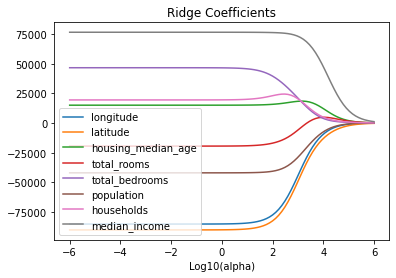

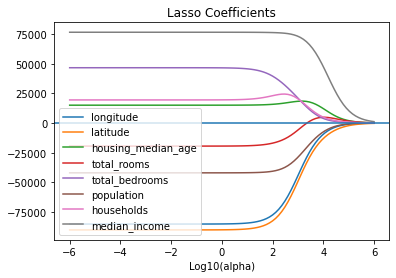

In [268]:
# create empty dfs
ridge_coefs = pd.DataFrame(columns = X.columns)
lasso_coefs = pd.DataFrame(columns = X.columns)

# loop through alphas
for a in alphas:
    lasso = Lasso(a).fit(X_train_scaled, y_train)
    ridge = Ridge(a).fit(X_train_scaled, y_train) 
    
    ridge_coefs.loc[a] = ridge.coef_
    lasso_coefs.loc[a] = lasso.coef_

# log-transform
ridge_coefs['Log10(alpha)'] = np.log10(ridge_coefs.index)
lasso_coefs['Log10(alpha)'] = np.log10(lasso_coefs.index)

import matplotlib.pyplot as plt

ridge_coefs.plot(x = 'Log10(alpha)', y = X.columns, kind = 'line', title = 'Ridge Coefficients')

ridge_coefs.plot(x = 'Log10(alpha)', y = X.columns, kind = 'line', title = 'Lasso Coefficients')

We can observe that as the log-transformed regularization parameter increases, the coefficients for ridge regression and lasso models approach zero.

a) Similarly, use sklearn.linear_model.ElasticNet to do linear regression with different α values, and plot the coefficients learned for each of them (2 pts).

b) Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models. (3pts)

<AxesSubplot:title={'center':'Elastic Net Coefficients'}, xlabel='Log10(alpha)'>

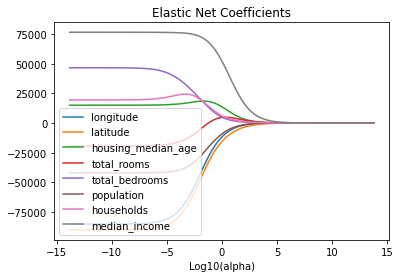

In [261]:
from sklearn.linear_model import ElasticNet

# create empty df
elastic_coefs = pd.DataFrame(columns = X.columns)

# loop through alphas
for a in alphas:
    
    elastic = ElasticNet(a).fit(X_train_scaled, y_train)
    
    elastic_coefs.loc[a] = elastic.coef_

elastic_coefs['Log10(alpha)'] = np.log(elastic_coefs.index)

elastic_coefs.plot(x = 'Log10(alpha)', y = X.columns, kind = 'line', title = 'Elastic Net Coefficients')

Looking at the plot, it appears that as the log-transformed alpha value increases, the elastic net coefficients approach zero as well, but faster than both ridge and lasso models. The benefits of ridge and lasso models are that they are some of the simplest regularization techniques. Elastic nets are computationally expensive, but offer solutions to the shortcomings of ridge and lasso without increasing significantly increasing bias.

Run the following three regression models with MSE loss on the training data (5 pts):

a) linear regression without regularization (1pts)

b) linear regression with ridge regularization (2pts)

c) linear regression with lasso regularization (2pts)

For part (b) and (c), use only the best regularization parameters. Report the MSE and R2 on the test data for each of the models.

Train the 3 models and report metrics with the original data without scaling (3pts)

Why did we have to scale the data in ridge and lasso regression? (3 pts)

In [308]:
# part a
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model_linear = LinearRegression().fit(X_train_scaled, y_train)
linear_pred = model_linear.predict(X_test_scaled)
linear_pred

# y_test, linear_pred
MSE_linear = metrics.mean_squared_error(y_test, linear_pred)
r2_linear = model_linear.score(X_train_scaled, y_train)

print('Linear Model: ')
print('MSE: ', round(MSE_linear, 3))
print('r2: ', round(r2_linear, 5))

Linear Model: 
MSE:  4861014374.694
r2:  0.63623


In [309]:
# part b
model_ridge2 = Ridge(alpha = ridges['Alpha'].iloc[38])
model_ridge2.fit(X_train, y_train)
model_ridge_pred2 = model_ridge2.predict(X_test)

MSE_ridge2 = mean_squared_error(y_test, model_ridge_pred2)
r2_ridge = model_ridge2.score(X_train, y_train)

print('Ridge Model: ')
print('MSE: ', round(MSE_ridge2, 3))
print('r2: ', round(r2_ridge, 5))

Ridge Model: 
MSE:  4861378294.324
r2:  0.63622


In [310]:
# part c
model_lasso2 = Lasso(alpha = lassos['Alpha'].iloc[34])
model_lasso2.fit(X_train, y_train)
model_lasso_pred2 = model_lasso2.predict(X_test)

MSE_lasso2 = mean_squared_error(y_test, model_lasso_pred2)
r2_lasso = model_lasso2.score(X_train, y_train)

print('Lasso Model: ')
print('MSE: ', round(MSE_lasso2, 3))
print('r2: ', round(r2_lasso, 5))

Lasso Model: 
MSE:  4861396623.291
r2:  0.63622
